<a href="https://colab.research.google.com/github/sunyingjian/study-tensorflow/blob/master/%E6%97%A5%E6%9C%88%E5%85%89%E5%8D%8E_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

tensorflow: 2.1.0


In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images=np.expand_dims(train_images,-1)
test_images=np.expand_dims(test_images,-1)

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
test_images.shape

(10000, 28, 28, 1)

In [0]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
model=tf.keras.Sequential()#使用顺序模型
model.add(tf.keras.layers.Conv2D(64,(3,3),
     input_shape=train_images.shape[1:],
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',
                 padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3),
     activation='relu',
     padding='same'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 128)        

In [0]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['acc'])

In [0]:
history=model.fit(train_images,train_labels,
         epochs=30,
         validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 38s 637us/sample - loss: 0.8016 - acc: 0.6969 - val_loss: 0.4366 - val_acc: 0.8328
Epoch 2/30
60000/60000 [==============================] - 37s 624us/sample - loss: 0.4709 - acc: 0.8260 - val_loss: 0.4220 - val_acc: 0.8516
Epoch 3/30
60000/60000 [==============================] - 38s 626us/sample - loss: 0.4323 - acc: 0.8415 - val_loss: 0.3867 - val_acc: 0.8546
Epoch 4/30
60000/60000 [==============================] - 38s 628us/sample - loss: 0.4113 - acc: 0.8489 - val_loss: 0.3671 - val_acc: 0.8550
Epoch 5/30
60000/60000 [==============================] - 38s 628us/sample - loss: 0.3926 - acc: 0.8566 - val_loss: 0.3641 - val_acc: 0.8609
Epoch 6/30
60000/60000 [==============================] - 38s 626us/sample - loss: 0.3836 - acc: 0.8600 - val_loss: 0.3399 - val_acc: 0.8757
Epoch 7/30
60000/60000 [==============================] - 38s 627us/sample - loss: 0.3822 - acc: 0.8593 

In [0]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

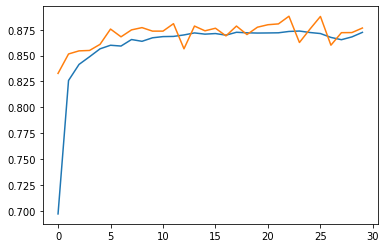

In [0]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

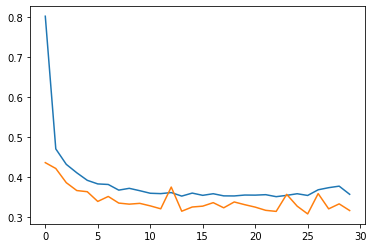

In [0]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')